In [87]:
# import basic necessities
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# retrieve data
from ucimlrepo import fetch_ucirepo, list_available_datasets

# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

sns.set_theme(style="darkgrid")

## Data Processing

In [36]:
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets
adults_df_raw = pd.concat([X,y], axis=1)
adults_df = adults_df_raw.copy()

In [37]:
# encode output variable to binary
adults_df['income'] = adults_df['income'].apply(lambda x: 1 if '<' in x else 0)

## Missingness

## EDA

### Basic Descriptive Statistics

In [41]:
adult.metadata.abstract

'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. '

In [42]:
adult.metadata.repository_url

'https://archive.ics.uci.edu/dataset/2/adult'

In [43]:
print(adult.metadata.additional_info.summary)

Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.



In [44]:
adults_df.shape

(48842, 15)

In [45]:
adults_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [46]:
adults_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.760718
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [47]:
adults_df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [48]:
adults_df.isna().sum().sum()

2203

### Plots

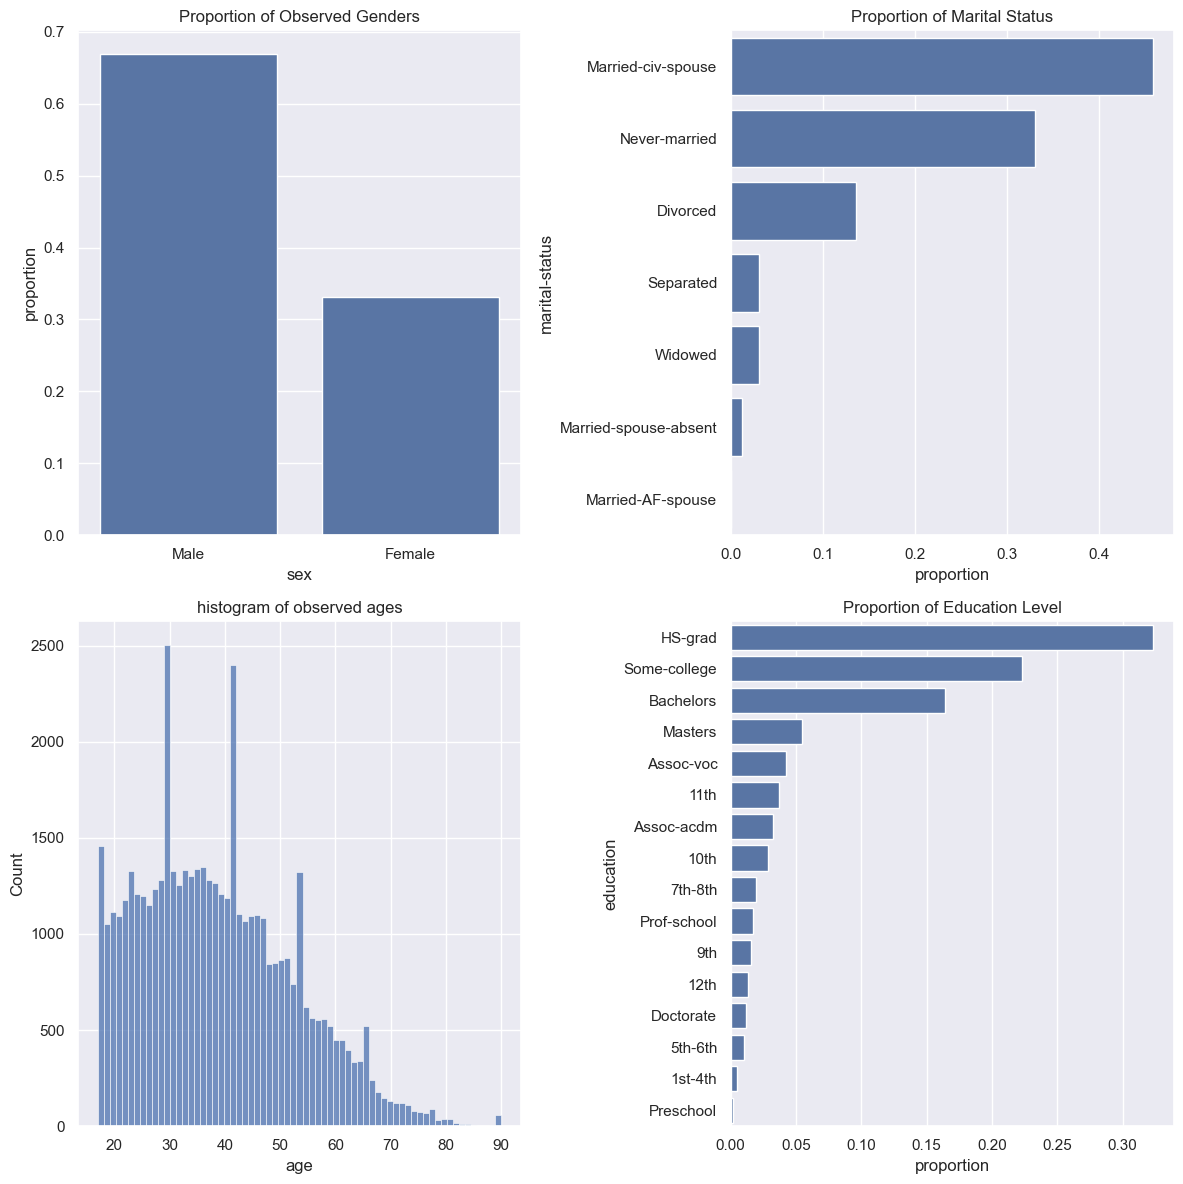

In [80]:
# Create 2x2 axis for plots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# prop of sex plot
prop_sex = adults_df['sex'].value_counts(normalize=True)
prop_sex_df = pd.DataFrame({'sex': prop_sex.index, 'proportion': prop_sex.values})
sns.barplot(data=prop_sex_df, x='sex', y='proportion', ax=axes[0,0])
axes[0, 0].set_title("Proportion of Observed Genders")

# prop of marital status plot
prop_marital = adults_df['marital-status'].value_counts(normalize=True)
prop_marital_df = pd.DataFrame({'marital-status': prop_marital.index, 'proportion': prop_marital.values})
sns.barplot(data=prop_marital_df, y='marital-status', x='proportion', ax=axes[0,1])
axes[0, 1].set_title("Proportion of Marital Status")

# prop of education level plot
prop_education = adults_df['education'].value_counts(normalize=True)
prop_education_df = pd.DataFrame({'education': prop_education.index, 'proportion': prop_education.values})
sns.barplot(data=prop_education_df, y='education', x='proportion', ax=axes[1,1])
axes[1,1].set_title("Proportion of Education Level")

# age plot
sns.histplot(adults_df['age'], ax=axes[1,0])
axes[1,0].set_title('histogram of observed ages')

# Show the plot
plt.tight_layout()
plt.show()

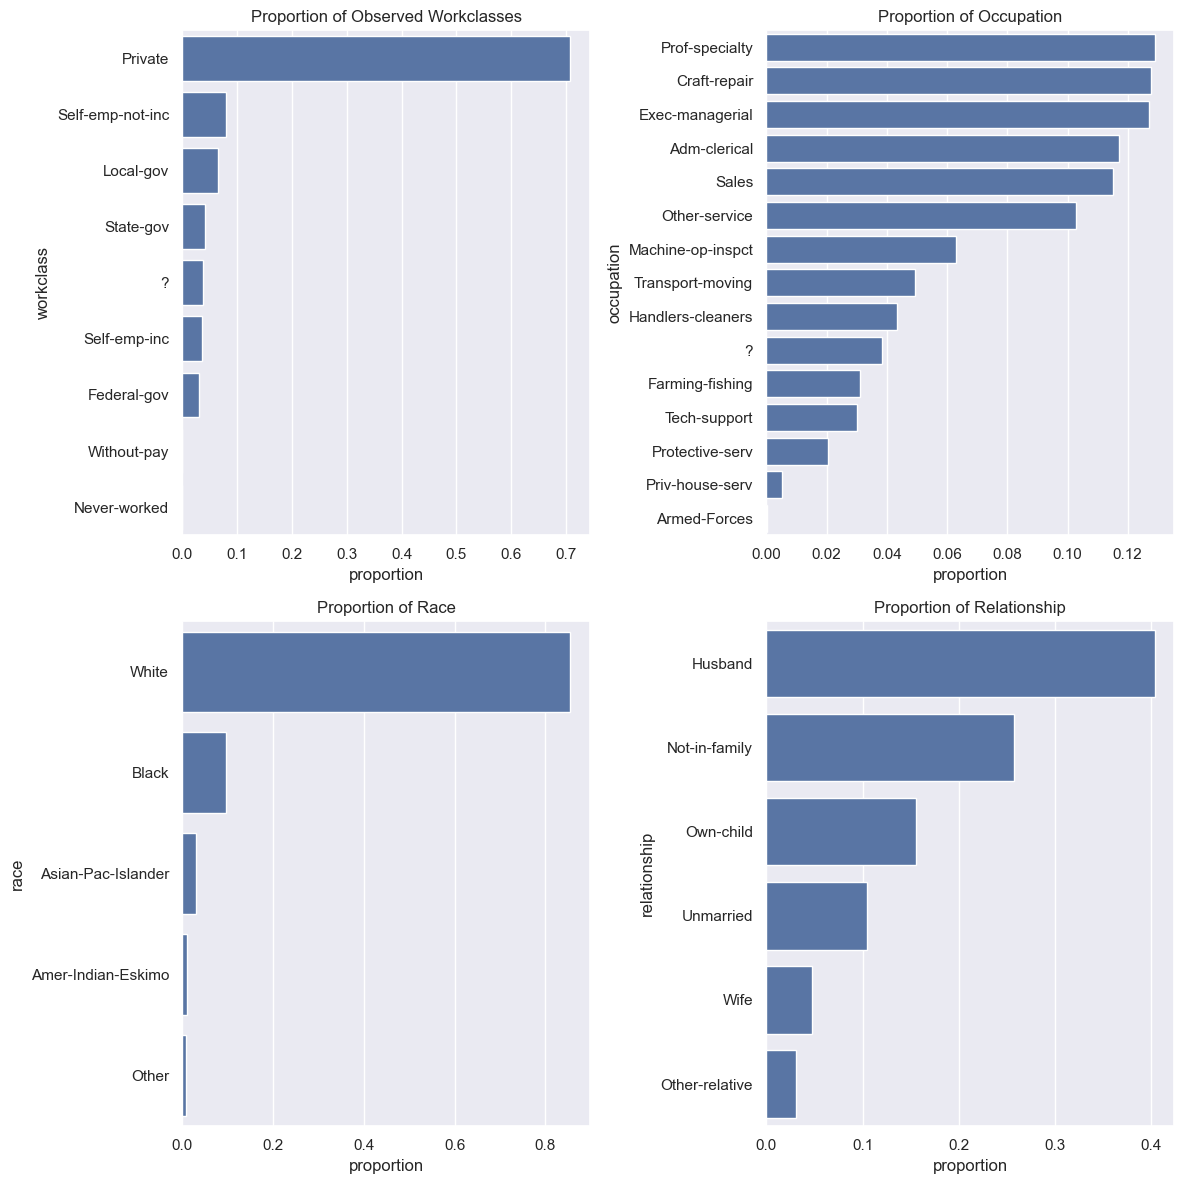

In [86]:
# Create 2x2 axis for plots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# prop of work class plot
prop_class = adults_df['workclass'].value_counts(normalize=True)
prop_class_df = pd.DataFrame({'workclass': prop_class.index, 'proportion': prop_class.values})
sns.barplot(data=prop_class_df, y='workclass', x='proportion', ax=axes[0,0])
axes[0, 0].set_title("Proportion of Observed Workclasses")

# prop of occupation plot
prop_occupation = adults_df['occupation'].value_counts(normalize=True)
prop_occupation_df = pd.DataFrame({'occupation': prop_occupation.index, 'proportion': prop_occupation.values})
sns.barplot(data=prop_occupation_df, y='occupation', x='proportion', ax=axes[0,1])
axes[0, 1].set_title("Proportion of Occupation")

# prop of relationship plot
prop_relationship = adults_df['relationship'].value_counts(normalize=True)
prop_relationship_df = pd.DataFrame({'relationship': prop_relationship.index, 'proportion': prop_relationship.values})
sns.barplot(data=prop_relationship_df, y='relationship', x='proportion', ax=axes[1,1])
axes[1,1].set_title("Proportion of Relationship")

# prop of race plot
prop_race = adults_df['race'].value_counts(normalize=True)
prop_race_df = pd.DataFrame({'race': prop_race.index, 'proportion': prop_race.values})
sns.barplot(data=prop_race_df, y='race', x='proportion', ax=axes[1,0])
axes[1,0].set_title("Proportion of Race")

# Show the plot
plt.tight_layout()
plt.show()

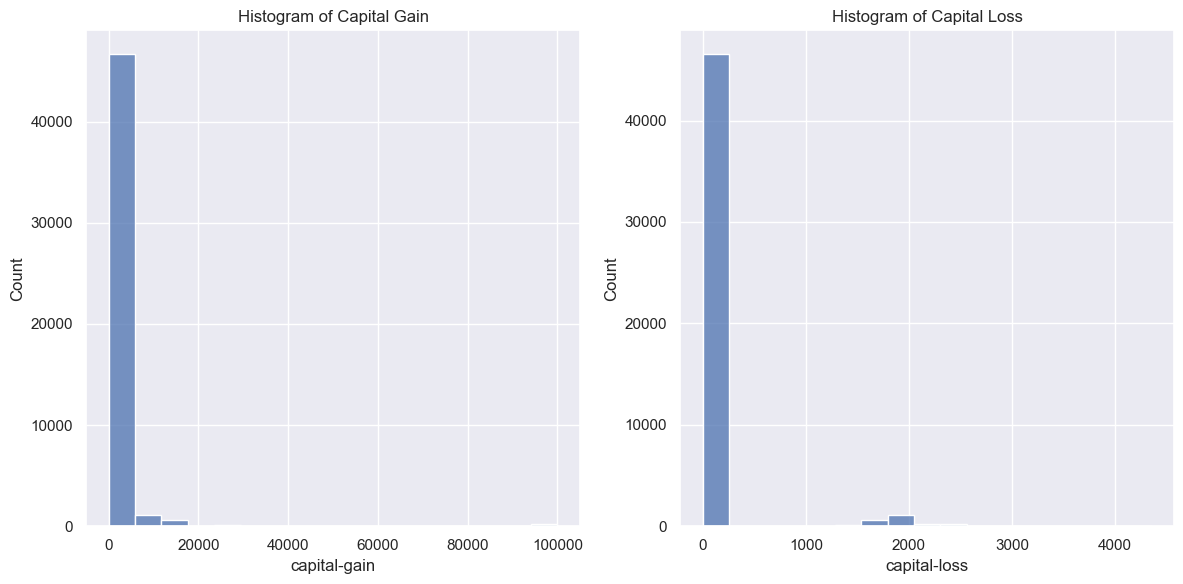

In [64]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram on the first subplot
sns.histplot(adults_df['capital-gain'], ax=axes[0])
axes[0].set_title("Histogram of Capital Gain")
# Add any other customizations like axes[0].set_xlabel(), axes[0].set_ylabel(), etc.

# Plot the second histogram on the second subplot
sns.histplot(adults_df['capital-loss'], ax=axes[1])
axes[1].set_title("Histogram of Capital Loss")
# Similarly, customize the second subplot as needed

# Show the plot
plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area.
plt.show()

## Naive Model Selection

## Bias Aware Model Selection

## Comparison

## Conclusion